# Final Project: Forest Cover Type Prediction

## Introduction

The main goal of this project is to use and compare alternative techniques for predicting forest cover types (the predominant kind of tree cover) from strictly cartographic variables.
I used a train and test datasets in CSV format. Train dataset has 15120 observations with 55 features (including Id) and target. Test dataset has total 565892 observations with 55 features (including Id). There are total 7 forest cover types. So this is a multiclass classification problem as I need to classify the instances into those 7 classes.
Following is the list of methods that I used to find out the best working method:
1.	K-Nearest Neighbor
2.	Support Vector Machine
3.	Random Forest
I have also performed fine tuning of parameters for all of these methods.
To accomplish this task, I have used Jupyter Notebook with Python 3. Following libraries are used to perform analysis and get desired outputs.
1.	Pandas – useful to import and clean the data up. Pandas dataframes are easier to use than raw numpy arrays since they give us column names and many methods to manipulate data.
2.	Sklearn – contains modules for dividing the data into parts, using different models and calculating accuracies.
3.	Seaborn – useful for plotting graphs. It is a wrapper around matplotlib providing nicer graphs.


In [2]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

## Data Selection

Before running any machine learning algorithm, the most important task is to have good dataset. There are chances that some values are missing or invalid in the dataset. Sometimes we need to introduce new features as well to make it easier to process the dataset or to apply specific algorithm. The activities included in data selection are: visualize the data, analyze it and clean it up. It also includes understanding the features, normalizing the data, dimensional reduction.

First the data is read from “train.csv” file and a **pandas** dataframe is created. If I look at the data, I find that there is a feature: “Id”. It is just for uniquely identifying each observation. This feature does not play any important role in training or testing any algorithm. So I start by removing this feature.

There are 10 quantitative features that are not scaled and 44 categorical features with values 0 or 1. I found no missing data in any of the columns. I scaled quantitative data using **StandardScaler** (removing the mean and scaling to unit variance) found in **pre-processing** module of **sklearn** library.

Let’s look at the distributions of the quantitative data to get a feeling for it. 


In [3]:
# read the train dataset
df_forest = pd.read_csv("train.csv")
df_forest.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


Check important details about the data.

In [4]:
# quick look at the data
df_forest.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Check the dataset for any null values

In [5]:
# clean the data frame
# checking missing values,  gives null values if any exists, in our case there is no null values
df_forest[df_forest.isnull().any(axis=1)]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


Great, no null values found in the dataset.

We can see that there is an **Id** column, which actually uniquely identifies each record. It is not necessary for our process. Let's remove it.

In [6]:
 # remove the id column as it is auto increment id and it is not required in building the model
df_forest.drop("Id", axis=1, inplace=True)

Create a list of all the column names. This will be useful when we want to select the data based on column names.

In [7]:
columns = df_forest.columns

# list for quantitative feature (column names)
quant_cols = columns[:10]
quant_cols

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

We have 10 quantitative columns. They are not scaled. Let's scale them using **StandardScaler**.
For security purpose we will scale them on a copy of dataframe.

In [8]:
# normilize the data frame for quantitative columns
scaler = StandardScaler()
ndf = df_forest.copy()
ndf[quant_cols] = scaler.fit_transform(df_forest[quant_cols])
ndf.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805,...,0,0,0,0,0,0,0,0,0,5
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710,...,0,0,0,0,0,0,0,0,0,5
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156,...,0,0,0,0,0,0,0,0,0,2
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981,...,0,0,0,0,0,0,0,0,0,2
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524,...,0,0,0,0,0,0,0,0,0,5


As the values in our quantitative columns are scaled, lets check the distribution of the data.

Plot histogram to know how the data is distributed.

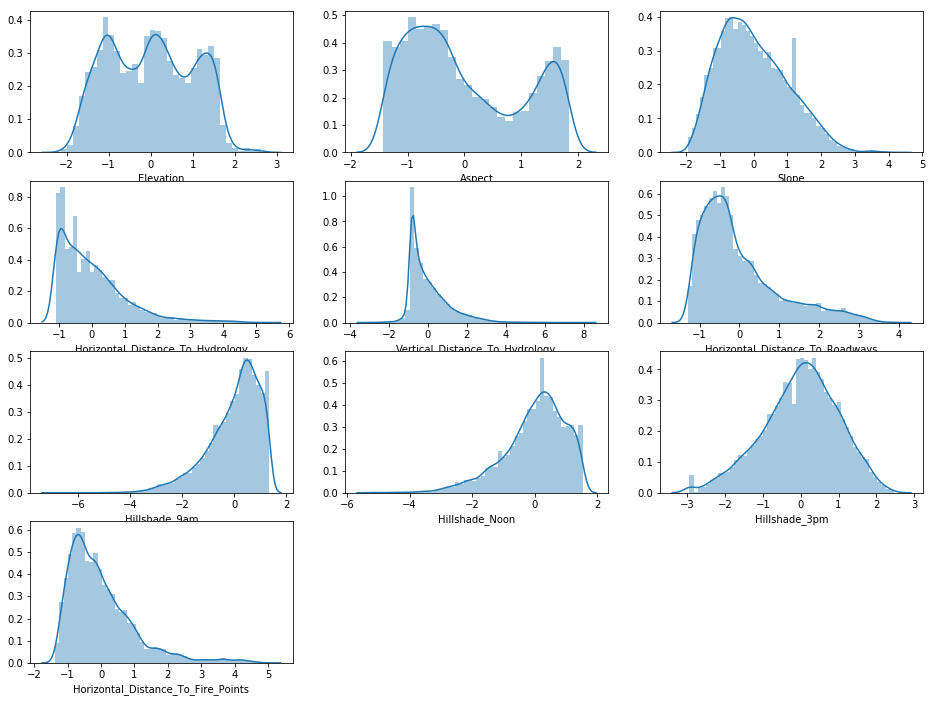

In [9]:
# let's have a look at the distibution of our data for the quantitative variable
fig = plt.figure(figsize=(16,12))
j = 0
for i in quant_cols:
    plt.subplot(4, 3, j + 1)
    j += 1
    sns.distplot(ndf[i], label=i)
plt.show()

As we see in the plot, most of the data has what seems to be a skewed normal distribution with the exception of **Aspect** which seems to be bimodal. **Elevation** also seems like multi-modal distribution.

Let’s plot the distribution of the quantitative variables according to their class.

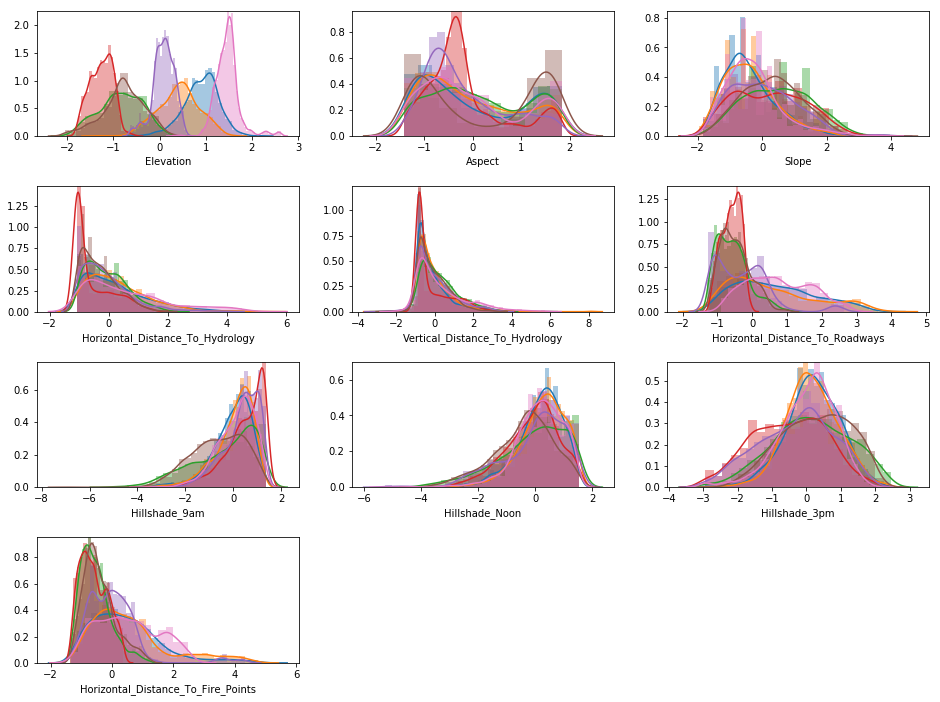

In [10]:
# lets compare the distribution with of each quantitative column with the target column 'Cover_Type'
plt.figure(figsize=(16, 12))
plt.subplots_adjust(hspace=.4)

j = 0
for c in quant_cols:
    plt.subplot(4, 3, j + 1)
    j += 1
    for i in range(1, 8):
        sns.distplot(ndf[df_forest['Cover_Type'] == i][c], label=c)
plt.show()

From the above graph we can see that **Elevation** has large effect on **Cover_Type**, while hill shades have similar effects on all the Cover_Type. As we can see, Elevation is the most potent indicator of the class.

As I have performed desired cleaning process, let's save the cleaned data in a CSV file.

In [11]:
ndf.to_csv("cleaned_train.csv", index=False)

Extract the features and target from data (**X** and **y**)

In [12]:
# extract features and target
X = ndf.drop("Cover_Type", axis=1)
y = ndf["Cover_Type"]

Split the data (X and y) into train and test datasets. We will use 70% data for training and 30% data for testing purpose.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

This function will help to plot confusion matrix.

In [14]:
def draw_confusion_matrix(y_test, y_pred):
    plt.figure(figsize=(10,8))
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index=range(1, 8), columns=range(1, 8))
    sns.heatmap(df_cm, annot=True, fmt='1')

# K-Nearest Neighbor (KNN)

This algorithm is one of the simplest supervised machine learning algorithms. K-Nearest Neighbour (KNN) algorithm is used for regression as well as classification problems. It classifies the data point based on how their neighbours are classified. **K** in this algorithm is a parameter that specifies the number of nearest neighbours. This algorithm looks promising for the kind of dataset we have.

I used standard **sklearn** method to train our **KNN** classifier model. To fine tune parameters, I set the value of **k** from 2 to 10. We used the **weights** parameter set to distance. With weights='distance', closer neighbours of a data point will have a greater influence than neighbours which are further away. We also set the number of jobs to -1, so that it will use all the available cores and complete the operation faster.

The best result I achieved using KNN is with k=2. It scored 80.27% accuracy. Following plots the confusion matrix I get for the KNN model with fine-tuned parameters.


In [15]:
# KNN
for k in range(2,15):
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs=-1, weights='distance')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("K:", k, "> Accuracy:", accuracy_score(y_test, y_pred))

K: 2 > Accuracy: 0.802689594356261
K: 3 > Accuracy: 0.7998236331569665
K: 4 > Accuracy: 0.8020282186948854
K: 5 > Accuracy: 0.7907848324514991
K: 6 > Accuracy: 0.7907848324514991
K: 7 > Accuracy: 0.7892416225749559
K: 8 > Accuracy: 0.791005291005291
K: 9 > Accuracy: 0.7872574955908289
K: 10 > Accuracy: 0.7859347442680776
K: 11 > Accuracy: 0.7859347442680776
K: 12 > Accuracy: 0.7821869488536155
K: 13 > Accuracy: 0.7749118165784833
K: 14 > Accuracy: 0.7757936507936508


From the results, we can say that the best value for **k** is **2** with accuracy **80.27%**. Let's use this best **k** to find the confusion matrix for KNN. We will plot the confusion matrix to get better understanding.

K: 2 > Accuracy: 0.802689594356261


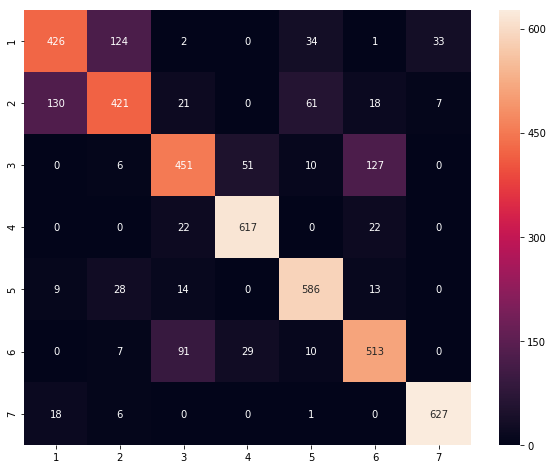

In [16]:
best_k = 2
classifier = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1, weights='distance')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

draw_confusion_matrix(y_test, y_pred)
print("K:", best_k, "> Accuracy:", accuracy_score(y_test, y_pred))

# Support Vector Machine (SVM)

Support Vector Machine (SVM) is a supervised learning model in machine learning that analyse data used for classification and regression. Normally SVM is used for binary classification. But there is an extension to this SVM which allows us to use it even for multi-class classifications.

In **sklearn** library, we get support for **SVC** (Support Vector Classification) model. It implements “one-against-one” approach for multi-class classification. We used **RBF** kernel as it suits the best for our dataset and classification problem. To fine tune its other parameters, we tried with different values of **C** and **gamma**. Here, C is a regularization parameter that controls the influence of each individual support vector and gamma is kernel coefficient.

To train our model, I used all the combinations of C and gamma where C is in [1, 10, 100, 1000] and gamma is in [1e-3, 1e-4]. After trying all these with RBF kernel, we get the best accuracy of **75.88%**. This accuracy is achieved with **C=1000** and **gamma=1e-3**. Following plots the confusion matrix we get for the SVC model with fine-tuned parameters.


In [17]:
#SVM
gammas = [1e-3, 1e-4]
cs = [1, 10, 100, 1000]

for g in gammas:
    for c in cs:         
        svc_classifier = SVC(kernel='rbf', gamma=g, C=c)        
        svc_classifier.fit(X_train, y_train)        
        y_pred = svc_classifier.predict(X_test)
        print("Gamma:", g, " C:", c, "> Accuracy:", accuracy_score(y_test, y_pred))

Gamma: 0.001  C: 1 > Accuracy: 0.6510141093474426
Gamma: 0.001  C: 10 > Accuracy: 0.6984126984126984
Gamma: 0.001  C: 100 > Accuracy: 0.7294973544973545
Gamma: 0.001  C: 1000 > Accuracy: 0.7588183421516755
Gamma: 0.0001  C: 1 > Accuracy: 0.41688712522045857
Gamma: 0.0001  C: 10 > Accuracy: 0.6516754850088183
Gamma: 0.0001  C: 100 > Accuracy: 0.6964285714285714
Gamma: 0.0001  C: 1000 > Accuracy: 0.722663139329806


From the results, we can say that the best value for **Gamma** is **1e-3** and **C** is **1000** with accuracy **75.88%**. Let's use these best parameters to find the confusion matrix for SVC. We will plot the confusion matrix to get better understanding.

Gamma: 0.001  C: 1000 > Accuracy: 0.7588183421516755


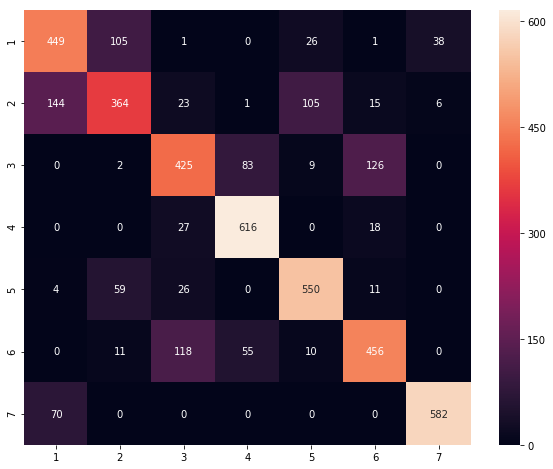

In [18]:
best_gamma = 1e-3
best_c = 1000

svc_classifier = SVC(kernel='rbf', gamma=best_gamma, C=best_c)        
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)

draw_confusion_matrix(y_test, y_pred)
print("Gamma:", best_gamma, " C:", best_c, "> Accuracy:", accuracy_score(y_test, y_pred))

# Random Forest

Decision trees are used for both classification and regression. The model behaves with “if this then that” conditions ultimately yielding a specific result. These trees send us down a specific route to find out an answer by using sequential questions. This model can get very good accuracy but decision trees are prone to overfitting, especially when a tree is particularly deep.

To solve this error in decision tree model, **Random Forest** model comes into the scene. A random forest is simply a collection of decision trees. The results of these decision trees are aggregated into a single final result. Random forest is one of the best models in machine learning to solve classification problems. Though, this model can be very slow for large amount of data.

I have used **RandomForestClassifier** model provided in **ensemble** module in **sklearn** library. We concentrated on fine tuning the most important two parameters: **n_estimators** and **max_depth**. The first one, n_estimator, specifies the number of trees in the forest. The second one, max_depth, specifies the maximum depth of the tree that the model should process to findout the result. 

To train our model, we used all the combinations of n_estimators and max_depth where n_estimators is in [100, 200, 500] and max_depth is in [10, 25, 50, 60]. After trying all these, we get the best accuracy of **86.51%**. This accuracy is achieved with **n_estimators=200** and **max_depth=50**. Following plots the confusion matrix we get for the Random Forest model with fine-tuned parameters. 


In [19]:
for estimator in [100,200,500]:
    for depth in [10,25,50,60]:
        rclassifier = RandomForestClassifier(n_estimators=estimator, max_depth=depth, n_jobs=-1, random_state=0)
        rclassifier.fit(X_train, y_train)        
        y_pred = rclassifier.predict(X_test)
        print("Tree-Depth:", depth, "Num-of-Trees:", estimator, "> Accuracy:", accuracy_score(y_test, y_pred))

Tree-Depth: 10 Num-of-Trees: 100 > Accuracy: 0.7848324514991182
Tree-Depth: 25 Num-of-Trees: 100 > Accuracy: 0.8600088183421517
Tree-Depth: 50 Num-of-Trees: 100 > Accuracy: 0.8641975308641975
Tree-Depth: 60 Num-of-Trees: 100 > Accuracy: 0.8641975308641975
Tree-Depth: 10 Num-of-Trees: 200 > Accuracy: 0.7874779541446209
Tree-Depth: 25 Num-of-Trees: 200 > Accuracy: 0.8622134038800705
Tree-Depth: 50 Num-of-Trees: 200 > Accuracy: 0.8650793650793651
Tree-Depth: 60 Num-of-Trees: 200 > Accuracy: 0.8650793650793651
Tree-Depth: 10 Num-of-Trees: 500 > Accuracy: 0.7885802469135802
Tree-Depth: 25 Num-of-Trees: 500 > Accuracy: 0.8628747795414462
Tree-Depth: 50 Num-of-Trees: 500 > Accuracy: 0.8624338624338624
Tree-Depth: 60 Num-of-Trees: 500 > Accuracy: 0.8624338624338624


From the results, we can say that the best value for **n_estimator** is **200** and **max_depth** is **50** with accuracy **86.51%**. Let's use these best parameters to find the confusion matrix for Random Forest. We will plot the confusion matrix to get better understanding.

Tree-Depth: 50 Num-of-Trees: 200 > Accuracy: 0.8650793650793651


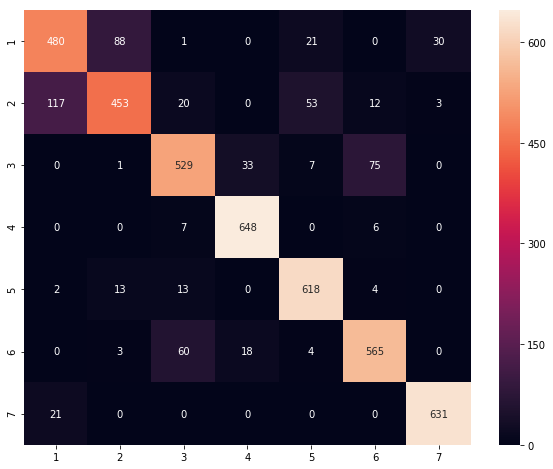

In [20]:
best_estimator = 200
best_depth = 50

rclassifier = RandomForestClassifier(n_estimators=best_estimator, max_depth=best_depth, n_jobs=-1, random_state=0)
rclassifier.fit(X_train, y_train)
y_pred = rclassifier.predict(X_test)

draw_confusion_matrix(y_test, y_pred)
print("Tree-Depth:", best_depth, "Num-of-Trees:", best_estimator, "> Accuracy:", accuracy_score(y_test, y_pred))

# Conclusion (Best Classifier)

We performed data reading, visualization, data cleansing & normalization. We split the data into train and test sets. Then we prepared some models and fine tuned best parameters for them by training them and predicting labels. Following is the list of all the models we tried (with different parameters):

1. K-Nearest Neighbor (Accuracy: 80.27%)
2. Support Vector Machine (Accuracy: 75.88%)
3. Random Forest (Accuracy: 86.51%)

As far as algorithms go, for data with this much training features and samples, **Random Forest** classifier seems to do the best. *K-Nearest Neighbor (KNN)* also performed good. Though, random forest is very slow for large dataset, I think **_Random Forest is a clear winner_** for this project.

# Predicting Cover_Type for test data

Now, as we have found our best classifier, **Random Forest**, let's read the data from **test.csv** file and predict the **Cover_Type** for all of its observations.


Save reference to the best classifier.

In [21]:
best_classifier = rclassifier

Read **test.csv** file and check out first few observations.

In [23]:
df_forest_test = pd.read_csv("test.csv")
df_forest_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


Check for any null values in test dataset.

In [24]:
df_forest_test[df_forest_test.isnull().any(axis=1)]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40


Ok. There is no null values found in test dataset.

Let's save **Id** column separately and remove it from the test dataset. This column will be useful for saving the predictions.

In [25]:
test_ids = df_forest_test["Id"]
df_forest_test.drop("Id", axis=1, inplace=True)

In [26]:
size = df_forest_test.shape[0]
size

565892

As the number of observations in test dataset is too big, we are facing Memory Error while processing it. To solve this issue, we will process 100000 observations at once and iterate through all the observations. This predictions will be saved in different CSV files.

In [27]:
last = 0

# start loop with step 100000
for i in range(100000, size + 100000, 100000):
    
    # reset i if it goes beyond the size
    if i > size:
        i = size
        
    # temporary dataframe holding 100000 observations
    tmp_df = df_forest_test.iloc[last:i]
    
    # scale quantitative feature values
    tmp_df[quant_cols] = scaler.fit_transform(tmp_df[quant_cols])
    
    # predict labels using the best classifier (Random Forest) we have trained
    preds = best_classifier.predict(tmp_df)
    
    # new dataframe holding only Id and Cover_Type
    new_df = pd.DataFrame(data={"Id": test_ids[last:i], "Cover_Type": preds})
    new_df.set_index("Id", inplace=True)
    
    # write to csv
    csv_name = "predicted_" + str(last) + "_" + str(i-1) + ".csv"
    new_df.to_csv(csv_name)
    print("Predictions saved to file:", csv_name)
    
    last = i

Predictions saved to file: predicted_0_99999.csv
Predictions saved to file: predicted_100000_199999.csv
Predictions saved to file: predicted_200000_299999.csv
Predictions saved to file: predicted_300000_399999.csv
Predictions saved to file: predicted_400000_499999.csv
Predictions saved to file: predicted_500000_565891.csv


All the predictions saved successfully to separate **CSV** files.

After applying the best parameters to the models, I found following accuracy:

    Model	                          Best Parameters	              Accuracy
    K-Nearest Neighbor (KNN)	    k=2, 	                            80.27%
    Support Vector Machine (SVM)	kernel=rbf, C=1000, gamma=1e-3	   75.88%
    Random Forest	               n_estomators=200, max_depth=50	   86.51%


As far as algorithms go, for data with this much training features and samples, Random Forest classifier seems to do the best. K-Nearest Neighbour (KNN) also performed good. Though, random forest is very slow for large dataset, I think Random Forest is a clear winner for this project.

# Using Random Forest model on test dataset

At last, I read observations from **test.csv** file and prepared a pandas data frame in Jupyter Notebook. There are total 565892 observations. I faced **Memory Error** while processing all the observations at once. To solve this issue, we divided all the observations into slots with 100000 observations in each slot. We then performed normalization on each slot data. We already have the Random Forest model trained with fine-tuned parameters on train dataset. So we used the same trained model on each slot to predict the labels. The labels are predicted and are stored in separate CSV file for each slot. These CSV files include only two columns: **Id** and **Cover_Type**.